In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 67s 0us/step


In [ ]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]


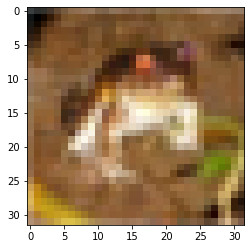

In [ ]:
i = 0
print(y_train[i])
plt.imshow(x_train[i])
plt.show()

In [ ]:
#Preprocessing

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#Build Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model = Sequential([
    Conv2D(filters=30, kernel_size=(4,4), strides=(1,1) ,padding='valid',
           activation='relu', input_shape=(32,32,3)),
    Dropout(rate=0.25),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    Conv2D(filters=60, kernel_size=3, strides=2, padding='same',
          activation='relu'),
    Dropout(rate=0.25),
    AveragePooling2D(pool_size=2, padding='same'),
    Flatten(),
    Dropout(rate=0.25),
    Dense(1024, activation='relu'),
    Dropout(rate=0.25),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 30)        1470      
                                                                 
 dropout_3 (Dropout)         (None, 29, 29, 30)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 60)          16260     
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 60)          0         
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 60)         0         
 ooling2D)                                            

In [ ]:
#Compile

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
#Train

train = model.fit(x_train, y_train, validation_split=0.2,
                 epochs=10, batch_size=128, verbose=1)

Epoch 1/10
313/313 [==============================] - 55s 166ms/step - loss: 1.6400 - accuracy: 0.4042 - val_loss: 1.4485 - val_accuracy: 0.4956
Epoch 2/10
313/313 [==============================] - 49s 156ms/step - loss: 1.3454 - accuracy: 0.5174 - val_loss: 1.2823 - val_accuracy: 0.5525
Epoch 3/10
313/313 [==============================] - 49s 156ms/step - loss: 1.2343 - accuracy: 0.5576 - val_loss: 1.1997 - val_accuracy: 0.5926
Epoch 4/10
313/313 [==============================] - 50s 159ms/step - loss: 1.1515 - accuracy: 0.5902 - val_loss: 1.0955 - val_accuracy: 0.6177
Epoch 5/10
313/313 [==============================] - 50s 159ms/step - loss: 1.0815 - accuracy: 0.6179 - val_loss: 1.0468 - val_accuracy: 0.6331
Epoch 6/10
313/313 [==============================] - 52s 165ms/step - loss: 1.0275 - accuracy: 0.6372 - val_loss: 0.9768 - val_accuracy: 0.6648
Epoch 7/10
313/313 [==============================] - 51s 164ms/step - loss: 0.9811 - accuracy: 0.6561 - val_loss: 1.0064 - val_ac

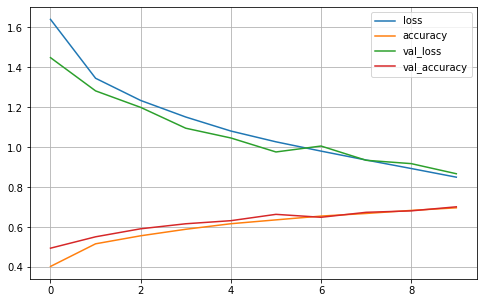

In [ ]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
#Evaluate
model.evaluate(x_test, y_test, verbose=0)

[0.8749291300773621, 0.6969000101089478]

In [ ]:
#Predict
y_proba = model.predict(x_test)
y_proba[:3].round(2)

313/313 [==============================] - 4s 12ms/step


array([[0.  , 0.  , 0.03, 0.68, 0.01, 0.22, 0.02, 0.  , 0.02, 0.  ],
       [0.  , 0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.83, 0.  ],
       [0.2 , 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.51, 0.1 ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[:3]

array([3, 8, 8], dtype=int64)

In [ ]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[761,  17,  64,  18,  13,   2,  17,   4,  81,  23],
       [ 23, 853,  16,  14,   0,   2,  11,   1,  22,  58],
       [ 62,   5, 664,  58,  70,  23,  78,  18,  12,  10],
       [ 19,   9, 128, 550,  63,  90,  93,  24,  11,  13],
       [ 27,   3, 138,  58, 614,  14,  98,  36,  10,   2],
       [ 14,   2, 120, 269,  49, 457,  57,  22,   4,   6],
       [  7,   4,  66,  37,  19,   4, 858,   1,   4,   0],
       [ 16,   5,  81,  74,  68,  40,  15, 688,   2,  11],
       [ 60,  47,  18,  21,   7,   4,  13,   3, 814,  13],
       [ 45, 122,  12,  31,   9,   2,  24,  10,  35, 710]], dtype=int64)